In [1]:
#used to visualise coco-style annotations on images to verify correctness 

import json
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [17]:
json_file = "/work/scitas-share/datasets/Vita/civil-459/OpenLane/raw/lane3d_300/training/segment-9907794657177651763_1126_570_1146_570_with_camera_labels/150828079053985500.json"
image_dir = "/work/scitas-share/datasets/Vita/civil-459/OpenLane/raw/images/"
green = (0, 255, 0)  
black = (0, 0, 0)
with open(json_file, 'r') as f:
    openlane_anno = json.load(f)

/work/scitas-share/datasets/Vita/civil-459/OpenLane/raw/images/training/segment-9907794657177651763_1126_570_1146_570_with_camera_labels/150828079053985500.jpg


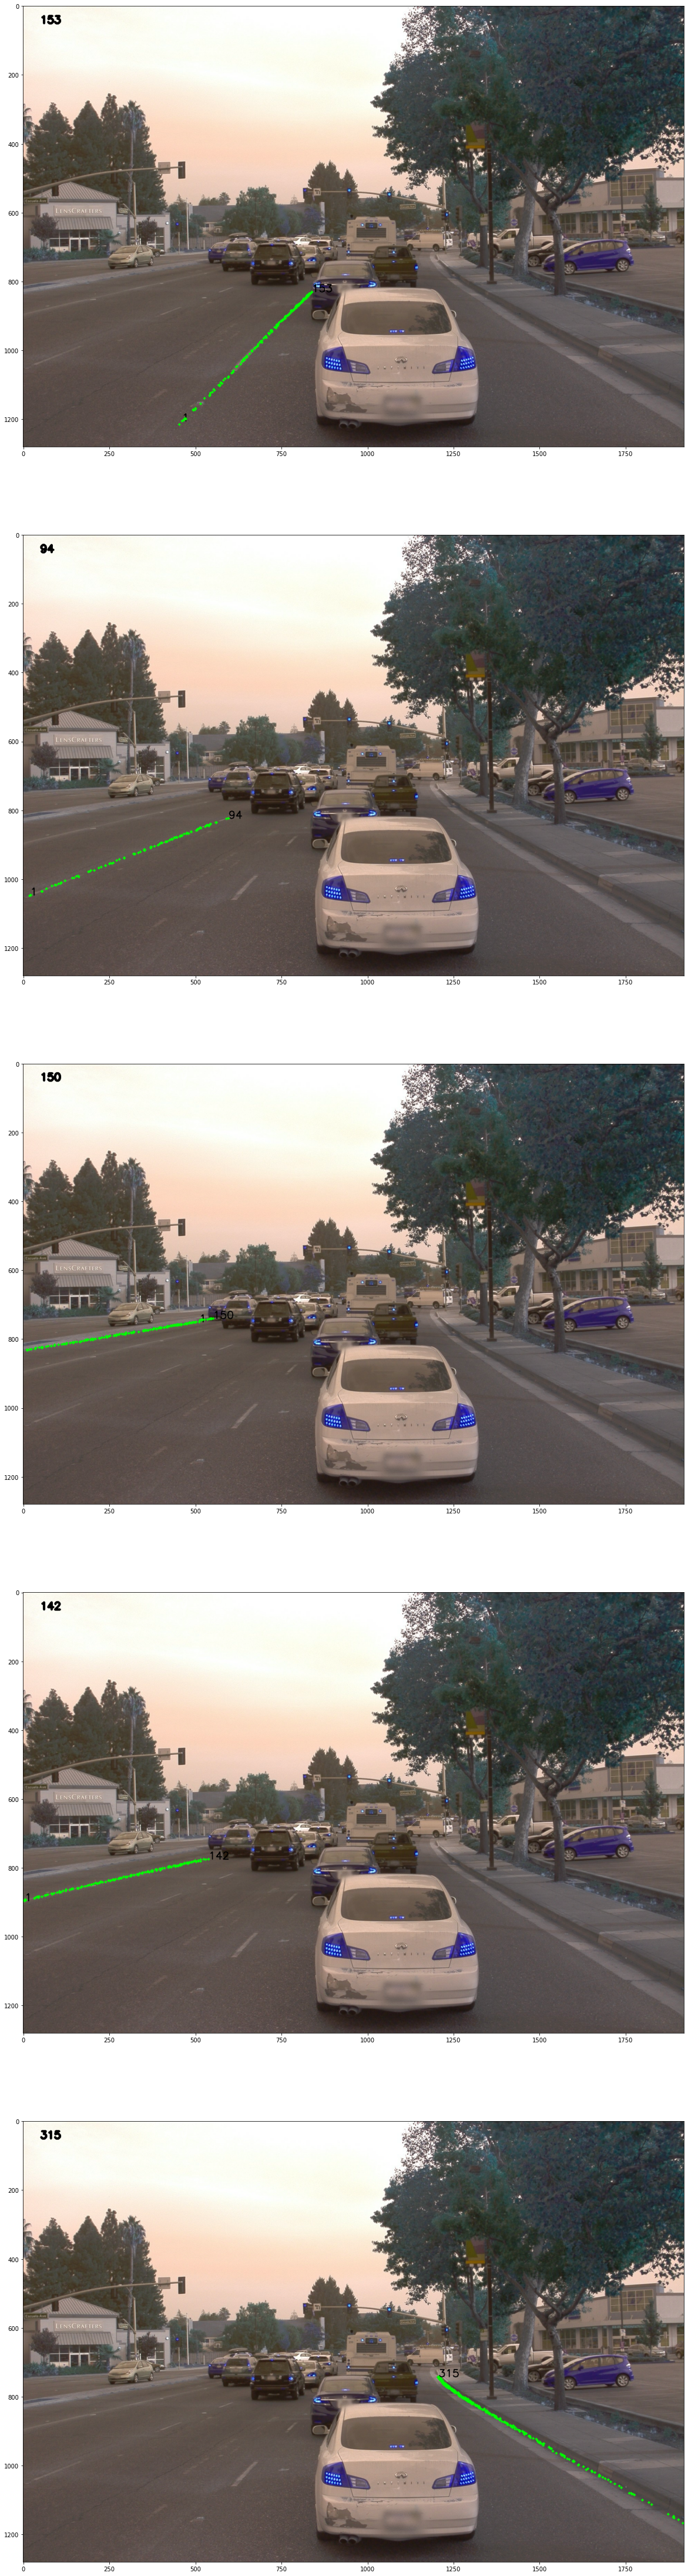

In [22]:
fig, axs = plt.subplots(5, 1, figsize=(80, 80))

image_file = image_dir + openlane_anno["file_path"] 

print (image_file)

for i, lane_dict in enumerate(openlane_anno["lane_lines"][:5]):
    image = cv2.imread(image_file)
    uv_dict = lane_dict["uv"]
    x = np.round(np.array(uv_dict[0])).astype(int)
    y = np.round(np.array(uv_dict[1])).astype(int)
   
    count = len(x)
    for j, coordinates in enumerate(zip(x, y)):
        if (j == 0 or j == count - 1):
             cv2.putText(image, str(j + 1), coordinates, cv2.FONT_HERSHEY_SIMPLEX, 1, black, thickness=2)
        cv2.drawMarker(image, coordinates, color=green, markerType=cv2.MARKER_CROSS, thickness=2,
                        markerSize=7)
    
    cv2.putText(image, str(count), (50,50), cv2.FONT_HERSHEY_SIMPLEX, 1, color=black, thickness=5)
    axs[i].imshow(image)